# Word Cloud

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Alice in WonderLand

In [29]:
with open('Alice.txt') as f:
    text = f.read()
len(text)

145190

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('said')
len(stop_words)

180

In [31]:
wc = WordCloud(background_color='white', max_words=1000, stopwords=stop_words)
wc.generate(text)

In [32]:
for i, (key, values) in enumerate(wc.words_.items()):
    if i <= 10:
        print(key, values)        

Alice 1.0
little 0.2958904109589041
one 0.2602739726027397
know 0.2465753424657534
like 0.2356164383561644
would 0.2273972602739726
went 0.2273972602739726
thing 0.2191780821917808
could 0.21095890410958903
time 0.21095890410958903
Queen 0.20821917808219179


In [33]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())

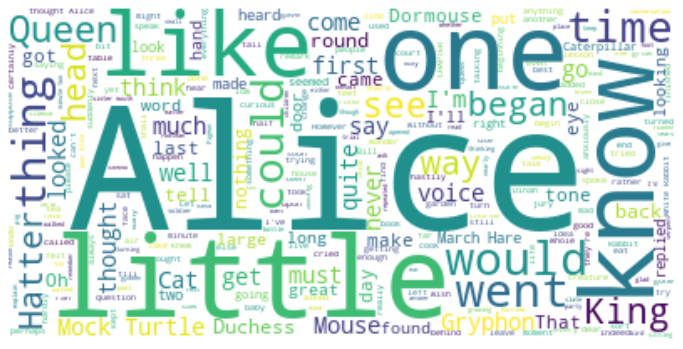

In [34]:
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시하기

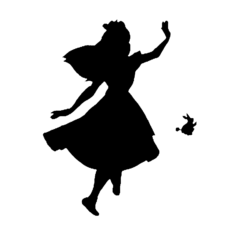

In [35]:
maskfile = 'Alice_mask.png'
mask = np.array(Image.open(maskfile))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
mask = np.array(Image.open('Alice_mask.png'))

In [37]:
wc = WordCloud(background_color='white', max_words=1000, stopwords=stop_words, mask=mask)
wc.generate(text)

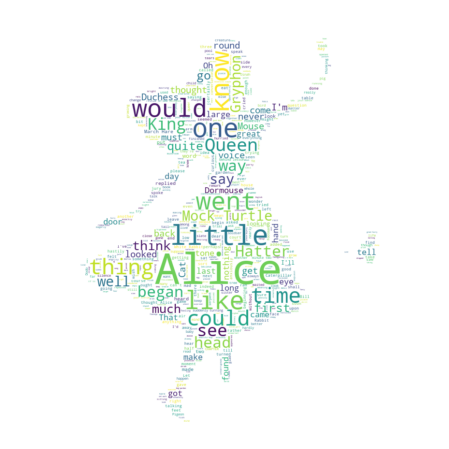

In [38]:
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Star Wars

In [55]:
with open('A_new_hope.txt') as f:
    text = f.read()

In [56]:
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

In [57]:
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)
stop_words.add('int')
stop_words.add('ext')
len(stop_words)

192

In [58]:
mask = np.array(Image.open('Stormtrooper_mask.png'))

In [59]:
wc = WordCloud(max_words=1000, stopwords=stop_words, mask=mask, margin=10, random_state=2021)
wc.generate(text)
default_colors = wc.to_array

In [60]:
import random
def grey_color(word, font_size, position,
               orientation, random_state=None,
               **kwargs):
    # return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)     
    # hue, saturation, lightness
    return f'hsl(0, 0%, {random.randint(60,100)}%)'

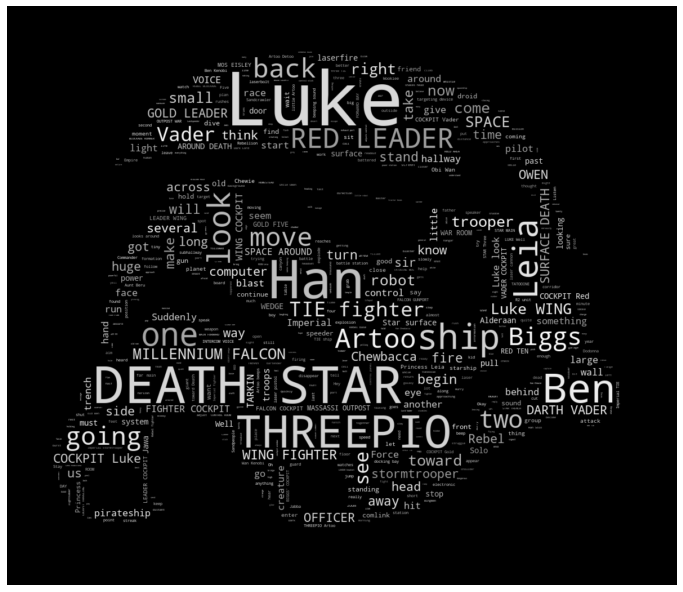

In [61]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2021), interpolation='bilinear')
plt.axis('off')
plt.show()